## Ilyes, Antonin, Côme 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import text

# 1. Decouverte de données

In [2]:
df = pd.read_csv('students.csv')
df=df.drop('Unnamed: 0',axis=1)

In [3]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,NaN,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,NaN,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,NaN,M,15,U,LE3,A,3,2,NaN,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
df.shape

(395, 33)

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,337.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.445104,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.709700,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


**L'écart type de G3 est plus important**

|     -    |G1 	    |G2 	 |G3      |
-----------|--------|--------|---------
|Ecart type|3.319195|3.761505|4.581443|

# 2. Détéction des données manquantes

In [6]:
df.isna().sum().loc[df.isna().sum()!=0].apply(lambda x: x*100/395)

school         1.012658
Mjob          13.164557
Fjob          12.658228
guardian       3.544304
traveltime    14.683544
dtype: float64

|Attributs     | Pourcentage (%)|
---------------|------------
|school        | 1.0127 |
|Mjob          |13.1646 |
|Fjob          |12.6582 |
|guardian      | 3.5443 |
|traveltime    |14.6835 |

## 3. Outliers

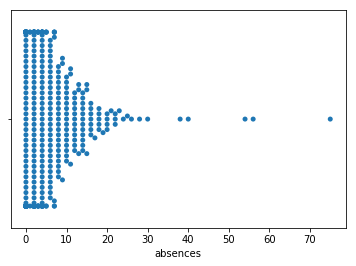

In [7]:
sns.swarmplot(df.absences)
plt.show()
#sns.swarmplot(df.G2)
#plt.show()
#sns.swarmplot(df.failures)
#plt.show()
#sns.swarmplot(df.studytime)
#plt.show()
#sns.swarmplot(df.traveltime)
#plt.show()

## 4. Mise en forme des données

In [8]:
df['mean']=(df.G1+df.G2)/2
df['validated']=np.where(df['G3']<10,0,1)   #colonne qui dit si oui (1) ou non (0) G3 est validé
cat_vars=list(df)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,mean,validated
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.5,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.0,0
2,GP,F,15,U,LE3,T,1,1,at_home,NaN,...,2,2,3,3,10,7,8,10,7.5,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.5,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.0,1


In [9]:
def check(cat):
    df2=df.groupby([cat,'validated']).size().reset_index(name='count')    #Nombre d'individu ayant validé dans cette catégorie
    df2['norm_count'] = df2['count'].div(df2.groupby(cat)['count'].transform('sum'))*100   #Pourcentage de réussite dans cette catégorie
    df2['cat_total']=df2['count']*100/df2['norm_count']             #nombre d'individu dans cette catégorie (ayant validé ou non)
    out=df2.drop(df2[df2['validated']==0].index,errors='ignore')    #supprime les lignes sans validations (pour l'affichage)
    return out

In [10]:
check('school')

,school,validated,count,norm_count,cat_total
1,GP,1,232,67.246377,345.0
3,MS,1,29,63.043478,46.0


ValueError: cannot insert validated, already exists

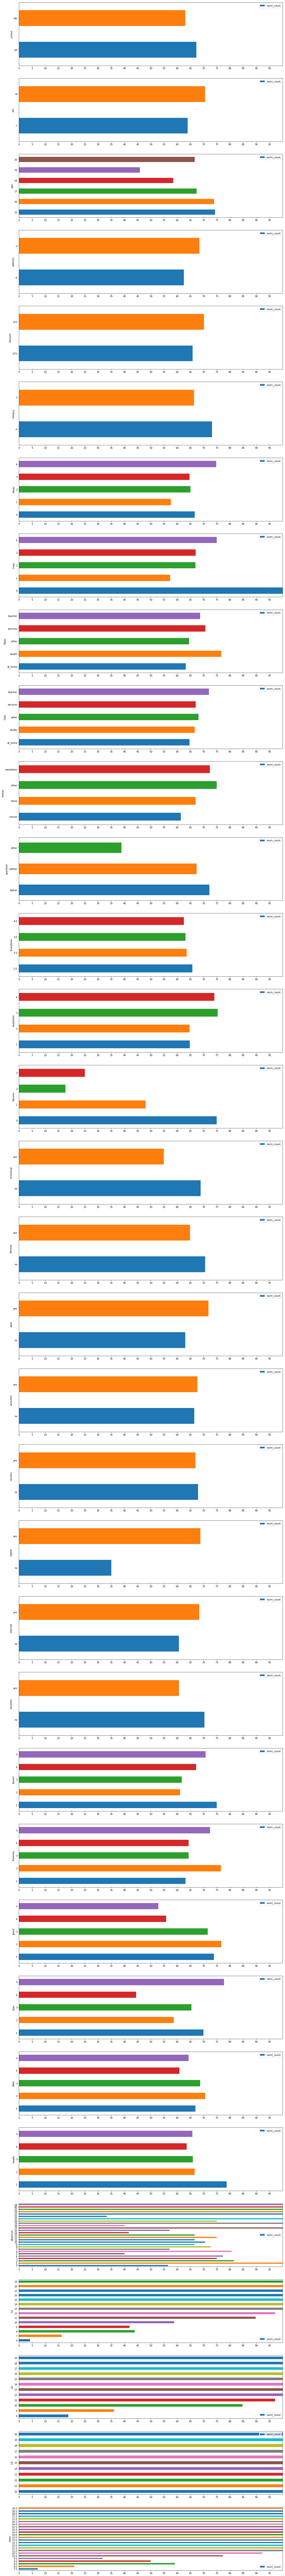

In [11]:
check(cat_vars[1])
fig,ax=plt.subplots(len(cat_vars)-1,figsize=(20,200))
for i in range(len(cat_vars)):
    out=check(cat_vars[i])
    out.plot(x=cat_vars[i],y='norm_count',ax=ax[i],kind='barh',xlim=[0,100])
    ax[i].xaxis.set_ticks(np.arange(0, 100, 5))   

Il faut verifier le nombre d'individus dans chaques catégories, pour toutes les variables. Si le nombre d'individus est trop faible, cette catégorie ne peut pas être utilisé. Ou il faut l'étudier différemment (ex : rassembler tous les individus avec une fort taux d'absence en 1 catégorie : absences <5, 5<absences<10, >10 absences).
Si les pourcentages sont similaire (ex nursery) alors cette variable peut être oubliée.

## 5. Analyse uni-varié

,romantic,validated,count,norm_count,cat_total
1,no,1,185,70.342205,263.0
3,yes,1,80,60.606061,132.0


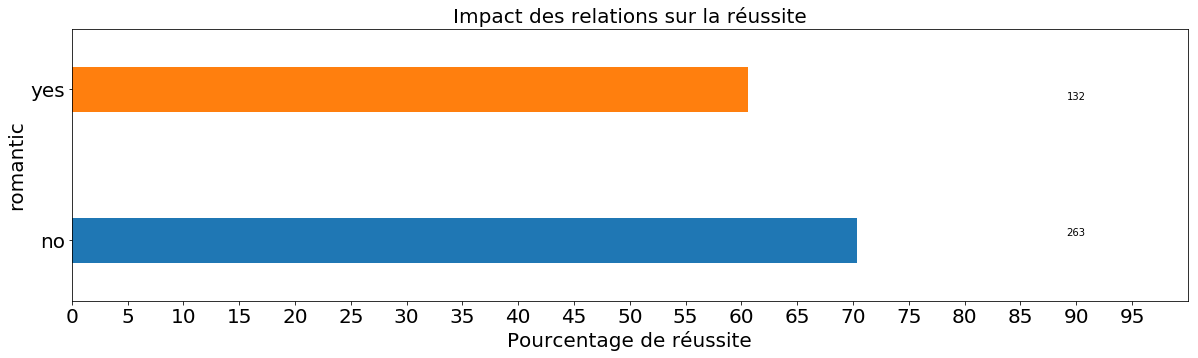

In [13]:
cindex='romantic'
c1=check(cindex)
cnumb=c1[cindex].count()
fig,ax=plt.subplots()
c1.plot(x=cindex,y='norm_count',ax=ax,kind='barh',width=0.3,xlim=[0,100],figsize=(20,5),legend=None)
plt.xlabel('Pourcentage de réussite')
plt.title("Impact des relations sur la réussite")
for i in range(cnumb):
    text(0.9, i/cnumb+(1)/(2*cnumb),int(c1.iloc[i]['cat_total']), ha='center', va='center', transform=ax.transAxes)
ax.xaxis.set_ticks(np.arange(0, 100, 5))   

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
c1

10 % de difference : c'est un paramètre important et qui est pertinent au vu des populations des deux catégories

,age,validated,count,norm_count,cat_total
1,15,1,61,74.390244,82.0
3,16,1,77,74.038462,104.0
5,17,1,66,67.346939,98.0
7,18,1,48,58.536585,82.0
9,19,1,11,45.833333,24.0
11,20,1,2,66.666667,3.0


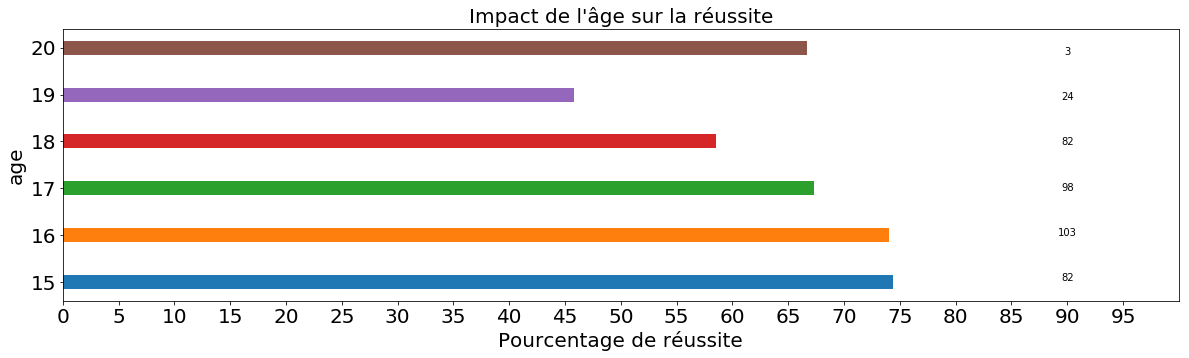

In [14]:
cindex='age'
c1=check(cindex)
cnumb=c1[cindex].count()
#c1=c1[c1[cindex]<20]
fig,ax=plt.subplots()
c1.plot(x=cindex,y='norm_count',ax=ax,kind='barh',width=0.3,xlim=[0,100],figsize=(20,5),legend=None)
plt.xlabel('Pourcentage de réussite')
plt.title("Impact de l'âge sur la réussite")
for i in range(cnumb):
    text(0.9, i/cnumb+(1)/(2*cnumb),int(c1.iloc[i]['cat_total']), ha='center', va='center', transform=ax.transAxes)
ax.xaxis.set_ticks(np.arange(0, 100, 5))  
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
c1
#c1[c1['absences']<5].groupby('validated').get_group('1').sum()

On ne peut pas prendre en compte les ages >20, mais sinon l'age est un paramètre important

,failures,validated,count,norm_count,cat_total
1,0,1,234,75.000000,312.0
3,1,1,24,48.000000,50.0
5,2,1,3,17.647059,17.0
7,3,1,4,25.000000,16.0


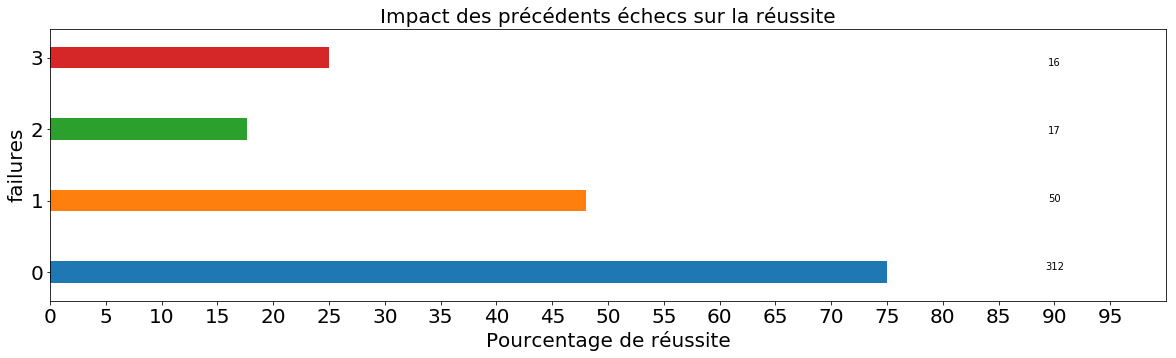

In [15]:
cindex='failures'
c1=check(cindex)
cnumb=c1[cindex].count()
fig,ax=plt.subplots()
c1.plot(x=cindex,y='norm_count',ax=ax,kind='barh',width=0.3,xlim=[0,100],figsize=(20,5),legend=None)
plt.xlabel('Pourcentage de réussite')
plt.title("Impact des précédents échecs sur la réussite")
for i in range(cnumb):
    text(0.9, i/cnumb+(1)/(2*cnumb),int(c1.iloc[i]['cat_total']), ha='center', va='center', transform=ax.transAxes)
ax.xaxis.set_ticks(np.arange(0, 100, 5))   

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
c1
#c1[c1['absences']<5].groupby('validated').get_group('1').sum()

## 5. Analyse multi-varié

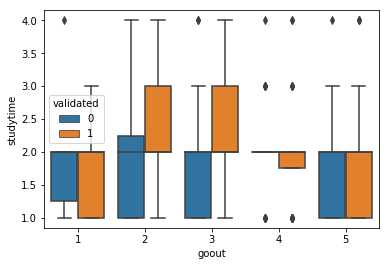

In [16]:
sns.boxplot(x='goout', y='studytime', hue='validated', data=df)
plt.rcParams['figure.figsize'] = 20, 10
plt.show()
#bubble plot plus approprié pour faire une comparaison d'effectifs

(0, 20)

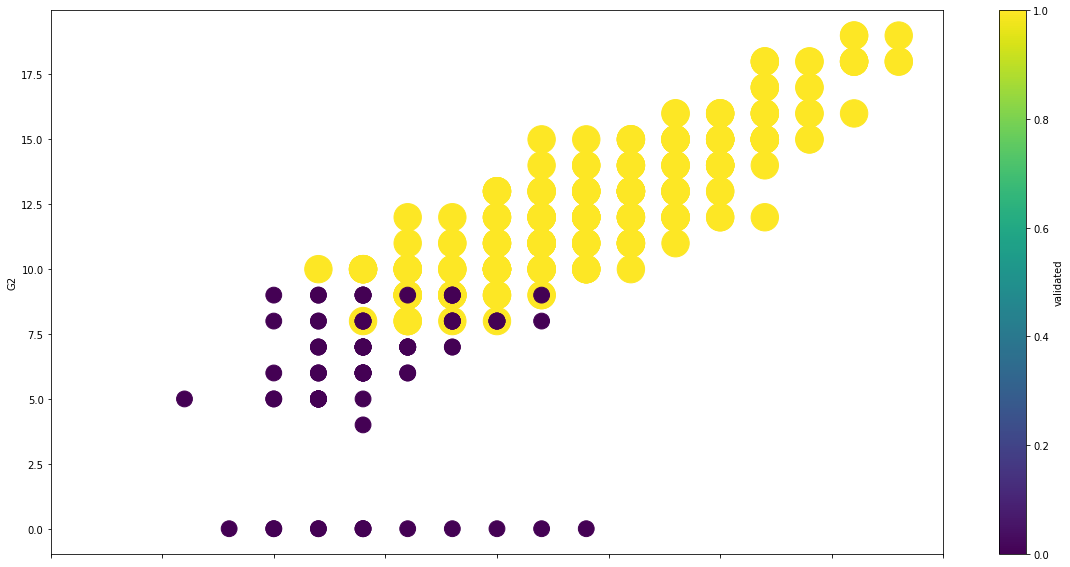

In [17]:
df.plot.scatter(x='G1', y='G2', c='validated',colormap='viridis',s=df.validated*500+250)
plt.xlim(0,20)

## Conclusion